Baseline solver converged at iteration 132.
Nesterov solver converged at iteration 50.
Anderson solver converged at iteration 30.
Baseline solver converged at iteration 18.
Nesterov solver converged at iteration 15.
Anderson solver converged at iteration 9.
Baseline solver converged at iteration 250.
Nesterov solver converged at iteration 61.
Anderson solver converged at iteration 44.
Baseline solver converged at iteration 37.
Nesterov solver converged at iteration 30.
Anderson solver converged at iteration 14.
Baseline solver converged at iteration 179.
Nesterov solver converged at iteration 108.
Anderson solver converged at iteration 46.
Baseline solver converged at iteration 126.
Nesterov solver converged at iteration 83.
Anderson solver converged at iteration 32.


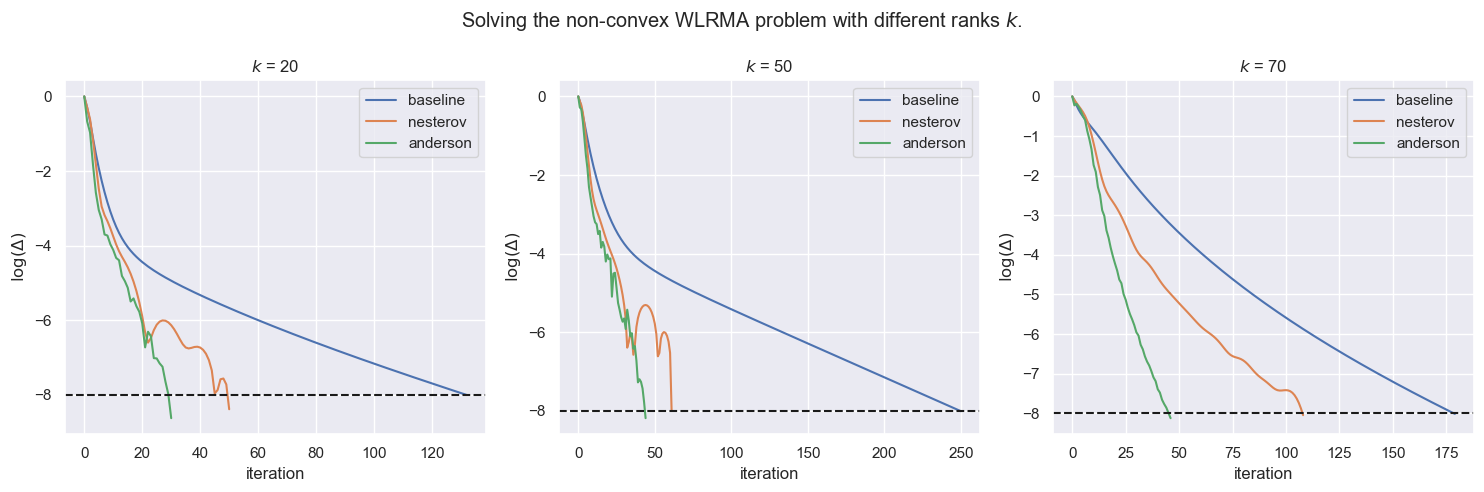

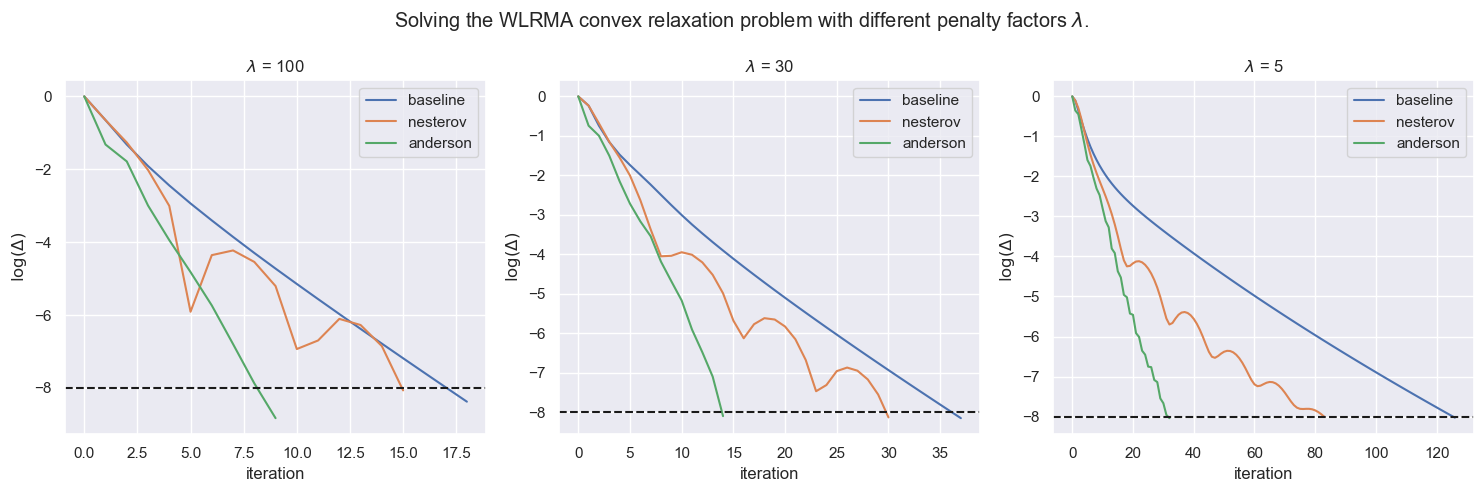

In [1]:
from wlrma_python import *
import matplotlib.pyplot as plt
import seaborn as sns

# Data generation.
datagen = DataGen(n=1000, p=100, r=70, sigma=1)
M, W = datagen.generate_data(seed=42)
# parameter settings.
k = [20, 50, 70]
lamda = [100, 30, 5]
# plot settings.
sns.set()
fig1, ax1 = plt.subplots(1, len(lamda), figsize=(15, 5))
fig2, ax2 = plt.subplots(1, len(lamda), figsize=(15, 5))
# iterate over different k and lambda.
for i, (k, lamda) in enumerate(zip(k, lamda)):
    # solve the non-convex problem.
    # baseline solver.
    s1 = WLRMASolver(M, W, k=k, relaxation=False, solver='baseline')
    s1.solve()
    # nesterov solver.
    s2 = WLRMASolver(M, W, k=k, relaxation=False, solver='nesterov')
    s2.solve()
    # anderson solver.
    s3 = WLRMASolver(M, W, k=k, relaxation=False, solver='anderson', memory=3)
    s3.solve()
    # solve the convex relaxation problem.
    # baseline solver.
    s4 = WLRMASolver(M, W, lamda=lamda, relaxation=True, solver='baseline')
    s4.solve()
    # nesterov solver.
    s5 = WLRMASolver(M, W, lamda=lamda, relaxation=True, solver='nesterov')
    s5.solve()
    # anderson solver.
    s6 = WLRMASolver(M, W, lamda=lamda, relaxation=True, solver='anderson', memory=3)
    s6.solve()

    # plot
    ax1[i].plot(np.log10(s1.delta), label='baseline')
    ax1[i].plot(np.log10(s2.delta), label='nesterov')
    ax1[i].plot(np.log10(s3.delta), label='anderson')
    ax1[i].axhline(y=np.log10(s1.tol), color='k', linestyle='--')
    ax1[i].set_xlabel('iteration')
    ax1[i].set_ylabel(r'$\log(\Delta)$')
    ax1[i].set_title(r'$k$ = {}'.format(k))
    ax1[i].legend()
    fig1.suptitle(r'Solving the non-convex WLRMA problem with different ranks $k$.')

    ax2[i].plot(np.log10(s4.delta), label='baseline')
    ax2[i].plot(np.log10(s5.delta), label='nesterov')
    ax2[i].plot(np.log10(s6.delta), label='anderson')
    ax2[i].axhline(y=np.log10(s4.tol), color='k', linestyle='--')
    ax2[i].set_xlabel('iteration')
    ax2[i].set_ylabel(r'$\log(\Delta)$')
    ax2[i].set_title(r'$\lambda$ = {}'.format(lamda))
    ax2[i].legend()
    fig2.suptitle(r'Solving the WLRMA convex relaxation problem with different penalty factors $\lambda$.')

fig1.tight_layout()
fig2.tight_layout()
# fig1.savefig('fig/simulation_nonconvex.pdf')
# fig2.savefig('fig/simulation_convex.pdf')